In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotting_utils import binToDf
import tikzplotlib
sns.set_theme(font_scale = 2)

In [2]:
df1 = binToDf('../output/unordered1.bin') # At T = 1.0
df2 = binToDf('../output/unordered2.bin') # At T = 2.4

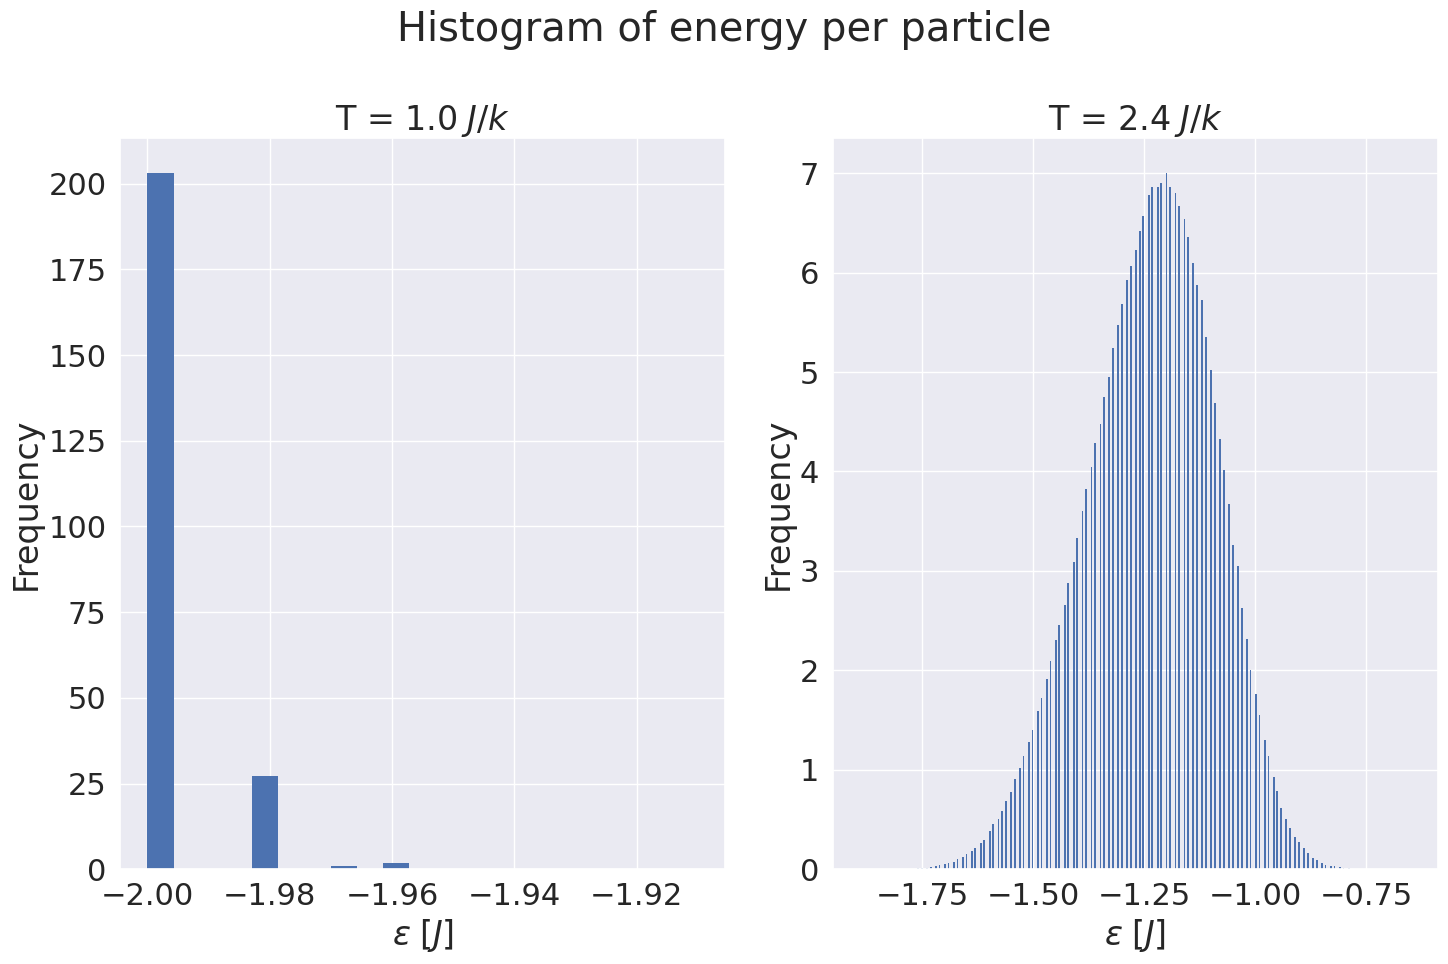

In [3]:
burnInindex = int(0.02*len(df1))
energy1 = df1.energy[burnInindex:]/df1.gridsize[0]**2
energy2 = df2.energy[burnInindex:]/df1.gridsize[0]**2

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].hist(energy1, bins = 'auto', density = True, edgecolor = 'None')
axs[1].hist(energy2, bins = 'auto', density = True, edgecolor = 'None')

axs[0].set_xlabel(r'$\epsilon\;[J]$')
axs[1].set_xlabel(r'$\epsilon\;[J]$')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
axs[0].set_title(r'T = $1.0\; J/k$')
axs[1].set_title(r'T = $2.4\; J/k$')
fig.suptitle('Histogram of energy per particle')
fig.tight_layout()
plt.savefig('figures/histogram.pdf', bbox_inches = 'tight')
tikzplotlib.save(
            f"tex/histogram.tex",
            extra_axis_parameters=[
                "title style={align=center}",
                "xmajorticks=true",
                "ymajorticks=true",
                "mark options={mark size=2.5pt, line width=1.5pt}",
            ],
            strict=True,
        )
plt.show()

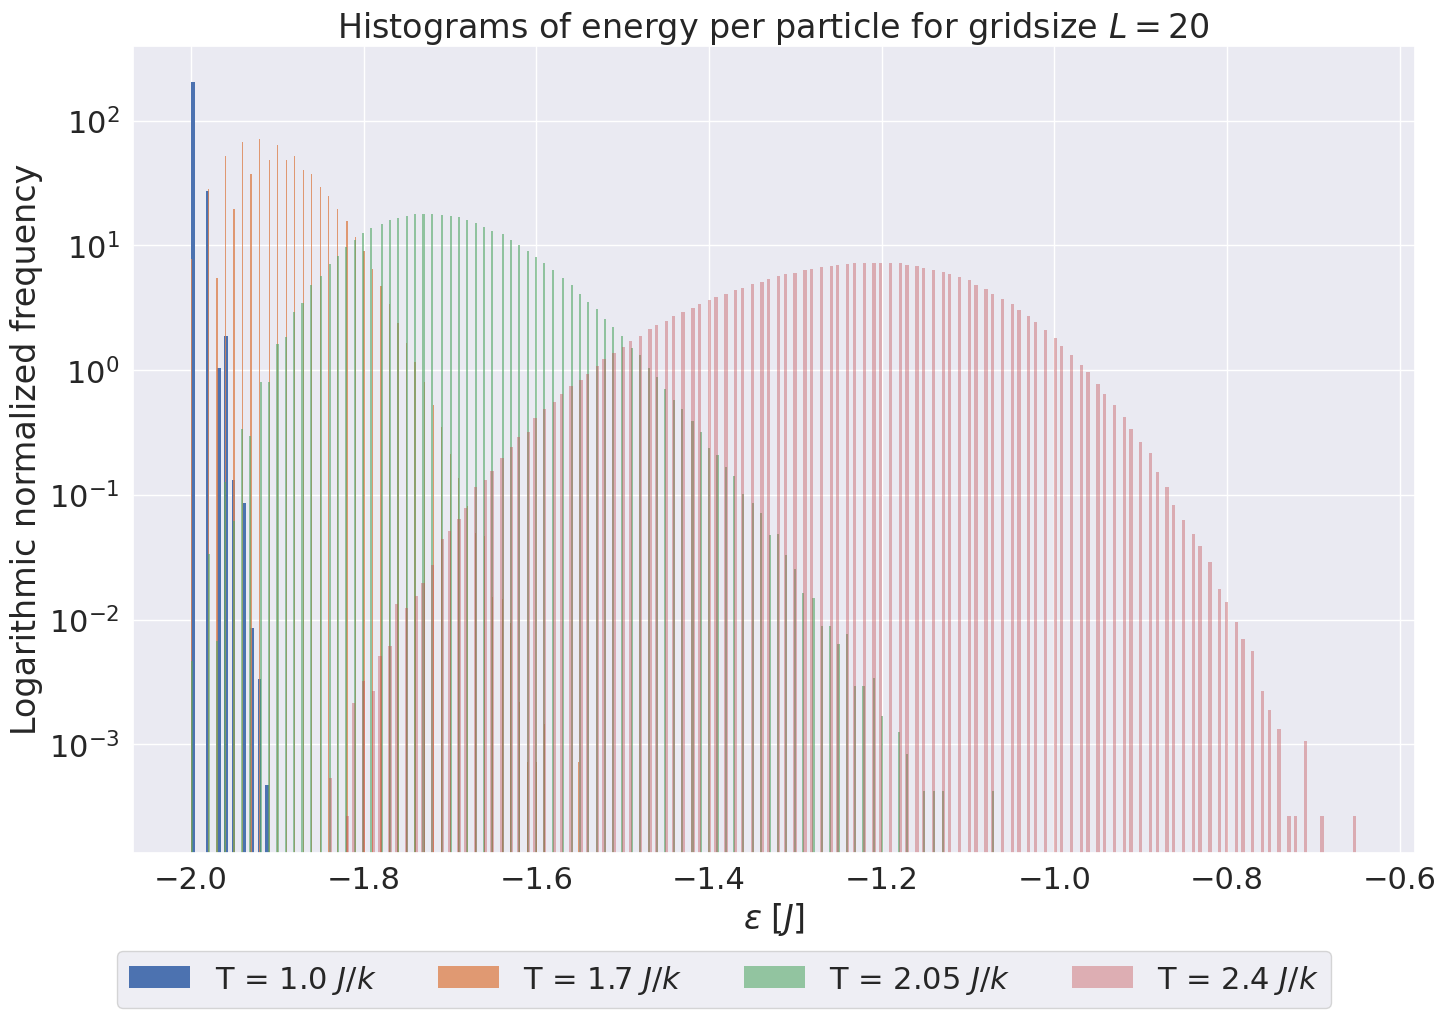

In [7]:
files40 = [f"../output/L=20_{i}.bin" for i in [0, 2, 3, 4]]
fig, axs = plt.subplots(1, 1, figsize = (15, 10))
for index, files in enumerate(files40):
    df = binToDf(files) 
    T = df.temperature[0]
    burnInindex = int(0.02*len(df))
    energy = df.energy[burnInindex:]/df.gridsize[0]**2
    axs.hist(energy, bins = 'auto', alpha = 1 - index/5, density = True, edgecolor = 'None', label = f'T = {T} $J/k$', align = 'mid')
axs.set_yscale('log')
axs.set_xlabel(r'$\epsilon\;[J]$')
axs.set_ylabel('Logarithmic normalized frequency')
axs.set_title(r'Histograms of energy per particle for gridsize $L = 20$')
lgd = fig.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.05))
fig.tight_layout()
plt.savefig('figures/severalhistogram.pdf', bbox_inches = 'tight')
tikzplotlib.save(
            f"tex/severalhistogram.tex",
            extra_axis_parameters=[
                "title style={align=center}",
                "xmajorticks=true",
                "ymajorticks=true",
                "mark options={mark size=2.5pt, line width=1.5pt}",
            ],
            strict=True,
        )
plt.show()

In [21]:
df = binToDf('../output/L=20_1.bin')
df.energy.min()

-1600.0